In [1]:
# K-Nearest Neighbors (KNN) on Iris dataset

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:

# 1. Load dataset
iris = load_iris()
X = iris.data[:, :2]  # Only first 2 features for 2D visualization
y = iris.target

In [3]:
# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [4]:
# 3. Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# 4. Try different K values
k_values = range(1, 8)
accuracies = []

In [24]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.3f}")

K=1, Accuracy=0.711
K=2, Accuracy=0.644
K=3, Accuracy=0.689
K=4, Accuracy=0.689
K=5, Accuracy=0.689
K=6, Accuracy=0.667
K=7, Accuracy=0.733


In [25]:
# Best K
best_k = k_values[np.argmax(accuracies)]
print("Best K:", best_k)

Best K: 7


In [26]:
# 5. Final model with best K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

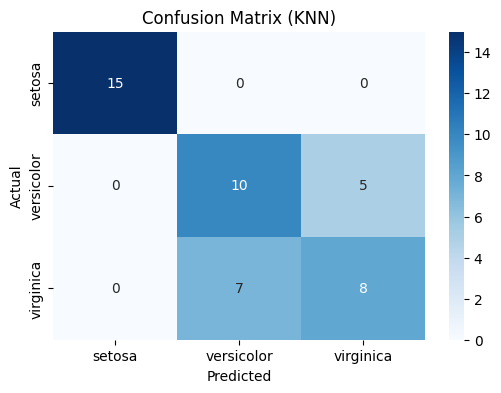

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (KNN)")
plt.show()

In [28]:
# 6. Decision Boundary Visualization
h = .02  # step size in mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [29]:
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\91971\AppData\Local\Temp\ipykernel_24748\2515746938.py:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', label="Test")


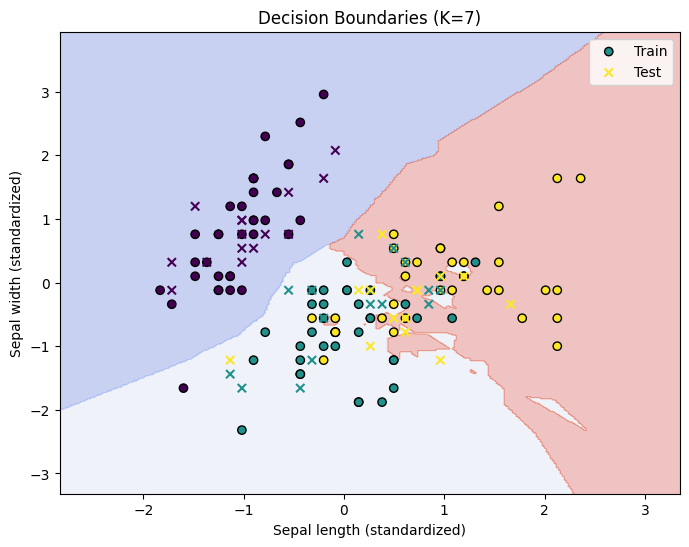

In [30]:
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label="Train")
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='x', label="Test")
plt.xlabel("Sepal length (standardized)")
plt.ylabel("Sepal width (standardized)")
plt.title(f"Decision Boundaries (K={best_k})")
plt.legend()
plt.show()

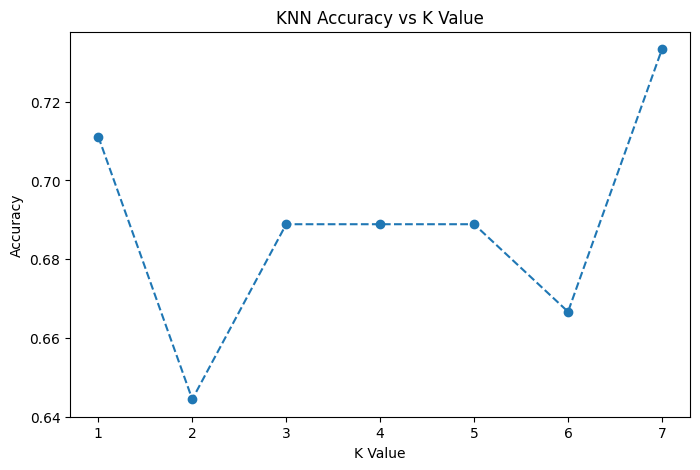

In [31]:
# Plot accuracies
plt.figure(figsize=(8,5))
plt.plot(k_values, accuracies, marker='o', linestyle='--')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K Value")
plt.show()